# Percorrendo a imagem

Uma imagem aberta com o OpenCV é uma matriz do Numpy.
Para manipular essa imagem, podemos usar a sintaze facilitada dessa API, bem como trabalhar com loops. Ou seja, teremos uma imagem **entrada** que vamos ler do disco e uma imagem **saida** que será uma transformação da imagem **entrada**.

In [104]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
plt.rcParams['figure.figsize'] = [15, 15]

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.3 


Vamos ler o arquivo [imagem.png](img/imagem.png).

In [105]:
entrada = cv2.imread("img/imagem.png")
entrada.shape

(512, 1024, 3)

Note que, apesar de vermos a imagem em tons de cinza, ela tem as três componentes R, G e B.

Vamos então convertê-la para níveis de cinza, usando a função `cvtColor()`.

Note que a imagem de saída não tem mais o terceiro canal.

(512, 1024)


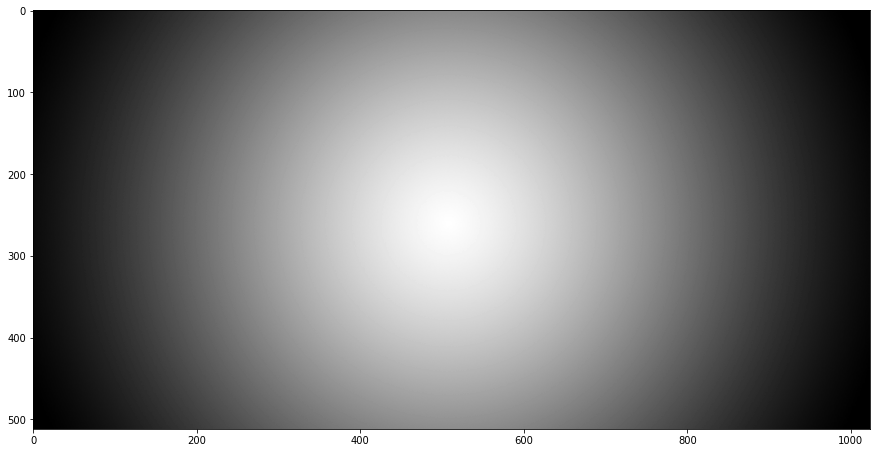

In [106]:
entrada = cv2.cvtColor(entrada, cv2.COLOR_BGR2GRAY)
print(entrada.shape)

# Mostrar a imagem
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)
plt.show()

## Criando uma imagem vazia.

A seguir, vamos criar uma imagem, denominada **saida**, vazia.

Primeiramente vamos fazer uma cópia da imagem original, usando a função `copy()`.

In [107]:
saida = entrada.copy()

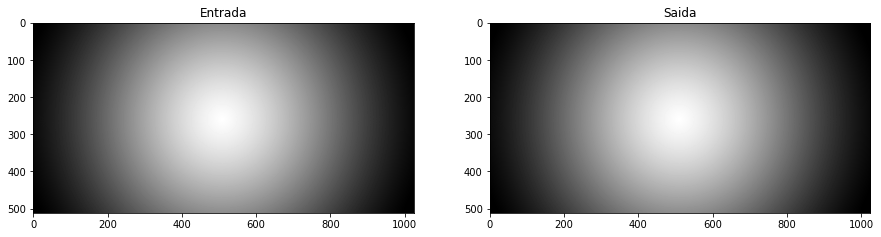

In [108]:
plt.subplot(1,2,1)
plt.title("Entrada")
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Saida")
plt.imshow(saida, cmap='gray', vmin=0, vmax=255)
plt.show()

Podemos zerar a imagem atribuindo o valor 0 a todos os pixels.

In [109]:
saida[:] = 0

Note que, depois de zerar, vemos a imagem toda como preto.

**Pergunta 1:** O que acontece se atribuirmos o valor 255 a todos os pixels?

**Pergunta 2:** O que aconteceria se não fizéssemos a cópia da imagem original, ou seja, `saida = entrada`?

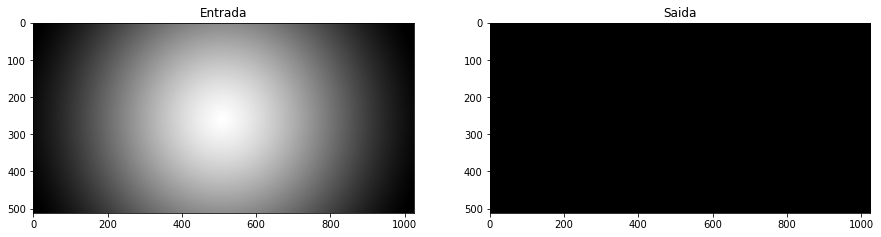

In [110]:
# Increase plot size
plt.subplot(1,2,1)
plt.title("Entrada")
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Saida")
plt.imshow(saida, cmap='gray', vmin=0, vmax=255)
plt.show()

Outro forma de criar uma imagem vazia é usando `np.zeros_like()`.

Esta função cria uma imagem com as mesmas dimensões, *like*, da imagem de entrada, mas com todos os pixels com valor 0.

In [111]:
saida = np.zeros_like(entrada, dtype=np.uint8)

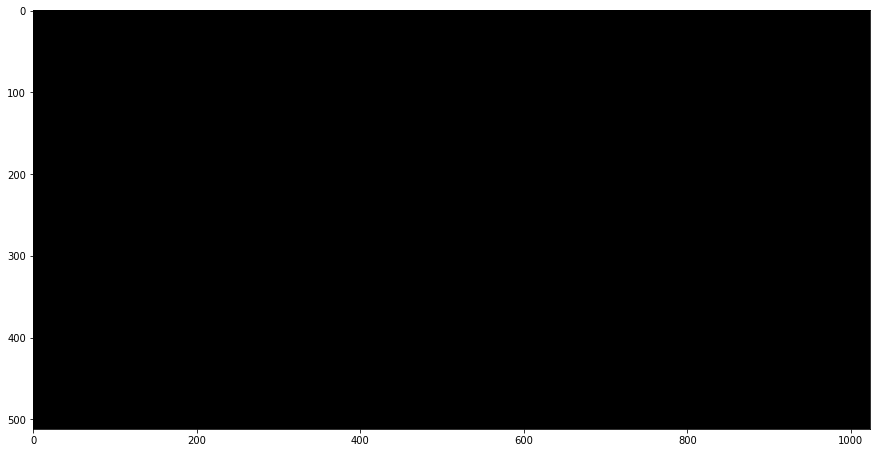

In [112]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

## Cortando uma imagem

A seguir, vamos aprender a cortar partes de uma imagem.

Podemos fazer um corte horizontal e um cortes vertical utilizando a indexação inteligente do numpy.

**Pergunta:** Na célula abaixo, porque estamos convertendo o valor para inteiro?

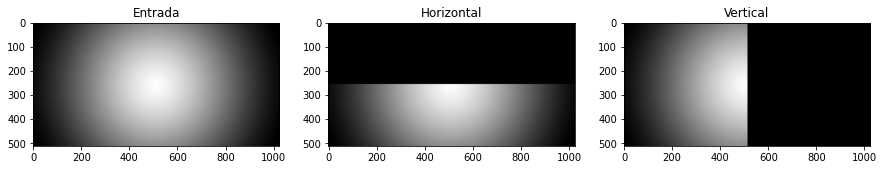

In [113]:
horizontal = entrada.copy()
vertical = entrada.copy()

width, height = entrada.shape

# Corte Horizontal
horizontal[:int(width/2), :] = 0

# Corte Vertical
vertical[:, int(height/2):] = 0

# Show entrada, horizontal and vertical
plt.subplot(1,3,1)
plt.title("Entrada")
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title("Horizontal")
plt.imshow(horizontal, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title("Vertical")
plt.imshow(vertical, cmap='gray', vmin=0, vmax=255)

plt.show()

## Percorrendo a imagem pixel a pixel

Podemos percorrer a imagem usando dois `for` encaixados e acessando os pixels usando a notação do numpy. Veja abaixo um exemplo.

**Pergunta:** Em qual sentido a imagem está sendo percorrida?

255


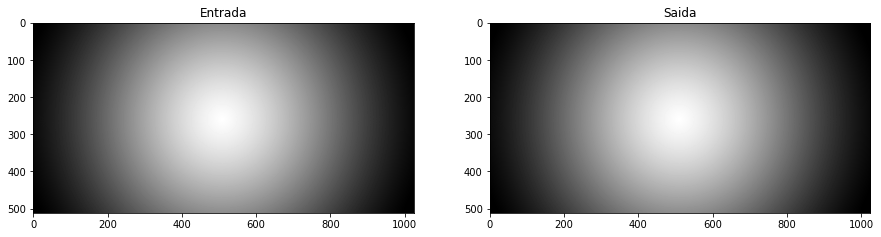

In [114]:
# Exemplo de como percorrer a imagem com for, copiando pixel a pixel
saida = np.zeros_like(entrada, dtype=np.uint8)

for i in range(entrada.shape[0]):
    for j in range(entrada.shape[1]):
        saida[i, j] = entrada[i, j]

print(np.max(saida))

plt.subplot(1,2,1)
plt.title("Entrada")
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Saida")
plt.imshow(saida, cmap='gray', vmin=0, vmax=255)
plt.show()

Vamos usar o mesmo loop acima para criar uma imagem mais interessante. 

Vamos usar a função *cosseno* para criar um efeito de onda na imagem. A fórmula não é especialmente importante aqui. 

**O valor do pixel de saída na posição `i, j` depende somente do valor dessa mesma posição na imagem de entrada.**

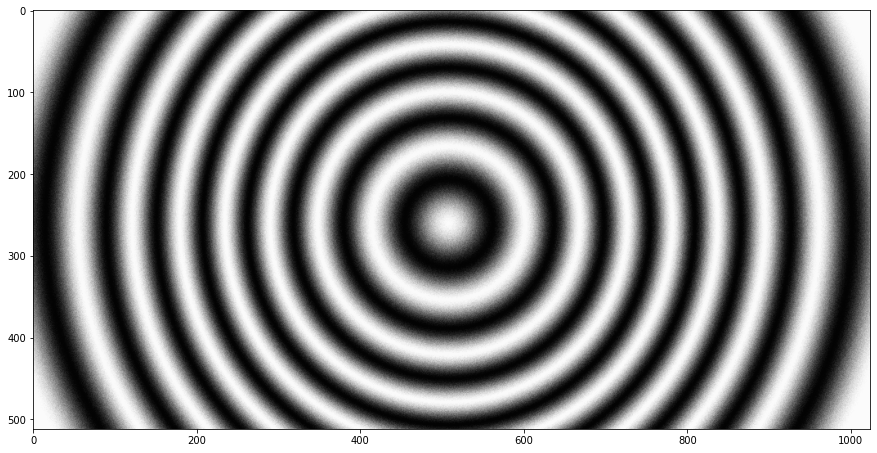

In [115]:
from math import cos, pi

def scale(valor):  
    return (valor/255.0)*16*pi

# percorre pixel a pixel
for i in range(entrada.shape[0]):
    for j in range(entrada.shape[1]):
        saida[i][j] = 127 + 124.0*cos(scale(entrada[i][j]))
        

# mostra a imagem
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Na imagem acima, vamos pintar de branco os pixels maiores do que 128.

Porém, vamos usar a **indexação inteligente do Numpy**.

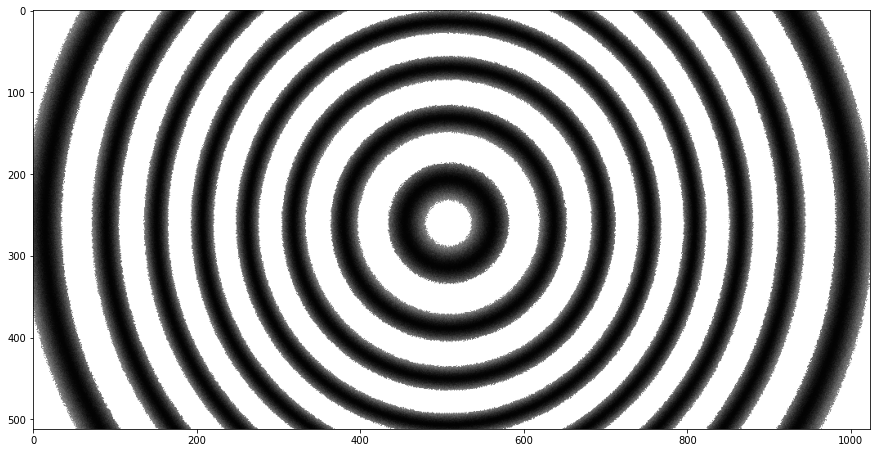

In [116]:
saida[saida > 128] = 255
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

##  Prática

Baixe uma imagem colorida da internet. Carregue a imagem com o OpenCV, converta para tons de cinza, e faça com que os pixels  maiores ou iguais a 128 fiquem brancos, enquanto os demais fiquem pretos. 

**Exercício 1**: Faça isso com os laços `for`

In [117]:
start = time.perf_counter()
# Usando o laço for

# # Desenvolva o código aqui # #

end = time.perf_counter()
print("Tempo de processamento: {:.4f} segundos".format(end - start))

Tempo de processamento: 0.0000 segundos


**Exercício 2**: Faça o mesmo, mas utilizando a indexação inteligente do numpy. Em seguida, compare o tempo de execução dos dois métodos atraves do codigo já disponivel nas celulas.

In [118]:
start = time.perf_counter()
# Usando a indexação inteligente

# # Desenvolva o código aqui # #

end = time.perf_counter()
print("Tempo de processamento: {:.4f} segundos".format(end - start))

Tempo de processamento: 0.0000 segundos
